# Stage 09 — Homework Starter Notebook

In the lecture, we learned how to create engineered features. Now it’s your turn to apply those ideas to your own project data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/raw/simulated_data.csv')
df['date'] = pd.to_datetime(df['date'])

## TODO: Implement at least 2 engineered features here

### Rationale for Feature 1
This feature is used to quantify the matching degree between personal consumption and income. A higher ratio may indicate that an individual is more aggressive in consumption at the current income level; conversely, a lower ratio may suggest that an individual has a strong saving ability or is more conservative in consumption. It helps to analyze the consumption habits and financial health of different groups of people.

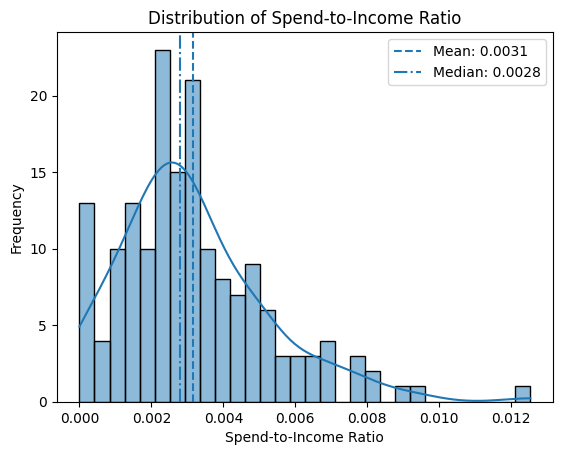


Spend-to-Income Ratio Statistics:
count    170.000000
mean       0.003143
std        0.002088
min        0.000000
25%        0.001785
50%        0.002786
75%        0.004204
max        0.012533
Name: spend_income_ratio, dtype: float64


In [5]:
def calculate_spend_income_ratio(df):
    """
    Calculate the spend-to-income ratio and add it to the dataframe
    
    Parameters:
        df: DataFrame containing 'spend' and 'income' columns
        
    Returns:
        DataFrame with added 'spend_income_ratio' column
        
    Raises:
        ValueError: If dataframe is missing 'spend' or 'income' columns
    """
    # Check for required columns
    required_columns = ['spend', 'income']
    if not set(required_columns).issubset(df.columns):
        missing = [col for col in required_columns if col not in df.columns]
        raise ValueError(f"Dataframe missing required columns: {missing}")
    
    # Calculate ratio with zero-income protection
    df = df.copy()  # Avoid modifying original data
    mask = df['income'] == 0
    if mask.any():
        print(f"Warning: Found {mask.sum()} records with zero income - these will be set to NaN")
        df.loc[mask, 'income'] = pd.NA  # Prevent division by zero
    
    df['spend_income_ratio'] = df['spend'] / df['income']
    return df

def visualize_spend_income_ratio(df):
    """
    Visualize the distribution of spend-to-income ratio (uses default styles)
    
    Parameters:
        df: DataFrame containing 'spend_income_ratio' column
        
    Raises:
        ValueError: If dataframe is missing 'spend_income_ratio' column
    """
    # Check if feature exists
    if 'spend_income_ratio' not in df.columns:
        raise ValueError("Dataframe missing 'spend_income_ratio' feature - calculate it first")
    
    # Remove NaN values for valid visualization
    ratio_data = df['spend_income_ratio'].dropna()
    if ratio_data.empty:
        raise ValueError("No valid 'spend_income_ratio' data available for visualization")
    
    # Use default plotting style (no custom settings)
    plt.figure()  # Default figure size
    
    # Default histogram with KDE
    sns.histplot(
        data=ratio_data,
        kde=True,
        bins=30  # Keep reasonable bin count (still default-friendly)
    )
    
    # Add mean/median lines (default colors/styles)
    mean_ratio = ratio_data.mean()
    median_ratio = ratio_data.median()
    plt.axvline(mean_ratio, linestyle='--', label=f'Mean: {mean_ratio:.4f}')
    plt.axvline(median_ratio, linestyle='-.', label=f'Median: {median_ratio:.4f}')
    
    # Default titles/labels (no custom font settings)
    plt.title('Distribution of Spend-to-Income Ratio')
    plt.xlabel('Spend-to-Income Ratio')
    plt.ylabel('Frequency')
    plt.legend()
    
    # Show plot (no custom layout adjustments)
    plt.show()
    plt.close()

# Usage example
if __name__ == "__main__":
    # Load your data here (uncomment and replace with your path)
    # df = pd.read_csv('../data/raw/simulated_data.csv')
    # df['date'] = pd.to_datetime(df['date'])
    
    try:
        # Calculate ratio first
        df_with_ratio = calculate_spend_income_ratio(df)
        
        # Display visualization (default style)
        visualize_spend_income_ratio(df_with_ratio)
        
        # Optional: Print basic statistics
        print("\nSpend-to-Income Ratio Statistics:")
        print(df_with_ratio['spend_income_ratio'].describe())
        
    except Exception as e:
        print(f"Error during execution: {str(e)}")

### Rationale for Feature 2
There may be differences in economic development levels, price levels, and consumption concepts in different regions. By calculating the regional average spending amount, we can understand the overall consumption ability and level of each region. This helps to identify regions with greater consumption potential or regions with relatively low consumption where the market needs to be further explored.

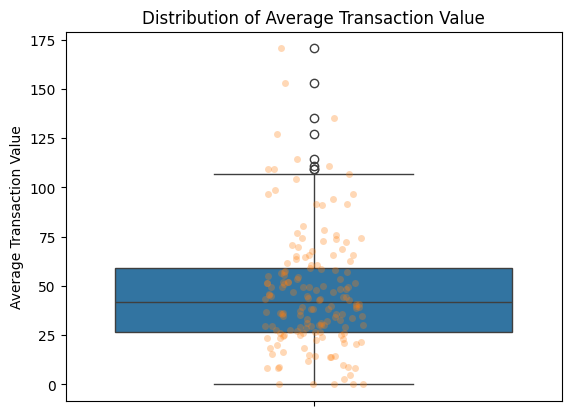


Average Transaction Value Statistics:
count    162.000000
mean      46.610633
std       29.897335
min        0.000000
25%       26.609773
50%       41.823500
75%       59.118750
max      170.560000
Name: avg_transaction_value, dtype: float64


In [6]:
def calculate_avg_transaction_value(df):
    """
    Calculate average transaction value and add it to the dataframe
    
    Parameters:
        df: DataFrame containing 'spend' and 'transactions' columns
        
    Returns:
        DataFrame with added 'avg_transaction_value' column
        
    Raises:
        ValueError: If dataframe is missing 'spend' or 'transactions' columns
    """
    # Check for required columns
    required_columns = ['spend', 'transactions']
    if not set(required_columns).issubset(df.columns):
        missing = [col for col in required_columns if col not in df.columns]
        raise ValueError(f"Dataframe missing required columns: {missing}")
    
    # Calculate ratio with zero-transactions protection
    df = df.copy()  # Avoid modifying original data
    mask = df['transactions'] == 0
    if mask.any():
        print(f"Warning: Found {mask.sum()} records with zero transactions - these will be set to NaN")
        df.loc[mask, 'transactions'] = pd.NA  # Prevent division by zero
    
    df['avg_transaction_value'] = df['spend'] / df['transactions']
    return df

def visualize_avg_transaction_value(df):
    """
    Visualize the distribution of average transaction value (uses default styles)
    
    Parameters:
        df: DataFrame containing 'avg_transaction_value' column
        
    Raises:
        ValueError: If dataframe is missing 'avg_transaction_value' feature
    """
    # Check if feature exists
    if 'avg_transaction_value' not in df.columns:
        raise ValueError("Dataframe missing 'avg_transaction_value' feature - calculate it first")
    
    # Remove NaN values for valid visualization
    transaction_data = df['avg_transaction_value'].dropna()
    if transaction_data.empty:
        raise ValueError("No valid 'avg_transaction_value' data available for visualization")
    
    # Create figure with default settings
    plt.figure()
    
    # Create boxplot with default style
    sns.boxplot(
        data=df,
        y='avg_transaction_value'
    )
    
    # Add strip plot to show density with default style
    sns.stripplot(
        data=df,
        y='avg_transaction_value',
        alpha=0.3,
        jitter=True
    )
    
    # Default titles and labels
    plt.title('Distribution of Average Transaction Value')
    plt.ylabel('Average Transaction Value')
    
    # Show plot
    plt.show()
    plt.close()

# Usage example
if __name__ == "__main__":
    # Load your data here (uncomment and replace with your path)
    # df = pd.read_csv('../data/raw/simulated_data.csv')
    # df['date'] = pd.to_datetime(df['date'])
    
    try:
        # Calculate average transaction value
        df_with_avg_trans = calculate_avg_transaction_value(df)
        
        # Display visualization
        visualize_avg_transaction_value(df_with_avg_trans)
        
        # Optional: Print basic statistics
        print("\nAverage Transaction Value Statistics:")
        print(df_with_avg_trans['avg_transaction_value'].describe())
        
    except Exception as e:
        print(f"Error during execution: {str(e)}")
    